In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def print_high_entropy_info(entropy_values, threshold=0.2):
    high_entropy_loci_indices = np.where(entropy_values > threshold)[0]

    # 遍历符合条件的索引，并按 "locus:entropy" 格式打印
    print(f"熵值大于 {threshold} 的位点和对应的熵值 (locus:entropy):")

    # 循环遍历符合条件的位点索引
    for index in high_entropy_loci_indices:
        # 打印格式为 "位点序号:熵值"
        # 注意：这里将索引加1，以便从1开始计数，更符合位点的直观表示
        locus_number = index + 1
        entropy_value = entropy_values[index]
        print(f"Locus {locus_number}: {entropy_value}", end=", ")
    print()

def plot_entropy_from_file(file_path):
    """
    从 CSV 文件中读取以逗号分隔的熵值，并绘制条形图。

    参数:
    file_path (str): 包含熵值的 CSV 文件路径。
    """
    try:
        # 1. 从文件中读取数据
        with open(file_path, 'r') as f:
            # 假设所有熵值都在第一行，并以逗号分隔
            line = f.readline()
            entropy_values_str = line.strip().split(',')

            # 转换为浮点数
            entropy_values = [float(val) for val in entropy_values_str]

        # 如果没有数据，则退出
        if not entropy_values:
            print("文件为空或不包含有效数据。")
            return

        # 2. 准备绘图
        locus_indices = range(1, len(entropy_values) + 1)
        entropy_values = np.array(entropy_values)
        
        print_high_entropy_info(entropy_values=entropy_values)

        # 3. 绘制条形图
        plt.figure(figsize=(20, 6))  # 设置图表大小
        plt.bar(locus_indices, entropy_values,
                color='skyblue', edgecolor='black')

        # 4. 添加标题和标签
        plt.title('Shannon Entropy', fontsize=16)
        plt.xlabel('Locus', fontsize=12)
        plt.ylabel('Entropy Value', fontsize=12)

        # 5. 调整X轴刻度以更好地显示位点数
        plt.xticks(
            locus_indices[::max(1, len(locus_indices)//20)], rotation=45)
        plt.grid(axis='y', linestyle='--')

        # 6. 显示图表
        plt.tight_layout()  # 自动调整布局，避免标签重叠
        plt.show()

    except FileNotFoundError:
        print(f"错误: 文件 '{file_path}' 未找到。")
    except (ValueError, IndexError):
        print("错误: 文件内容格式不正确。请确保它包含以逗号分隔的数字。")

熵值大于 0.2 的位点和对应的熵值 (locus:entropy):
Locus 1: 0.18699741, Locus 2: 0.9920259, Locus 3: 0.9926851, Locus 4: 1.0846804, Locus 5: 0.40158182, Locus 7: 0.4275952, Locus 8: 0.3644991, Locus 10: 0.8703101, Locus 12: 0.36265612, Locus 14: 0.36265612, Locus 15: 0.14788401, Locus 16: 0.36357832, Locus 19: 1.1448995, Locus 21: 1.313117, Locus 37: 0.20157176, Locus 41: 0.16705044, Locus 64: 0.11487297, Locus 66: 0.11633282, Locus 71: 0.19485192, Locus 72: 0.21065551, Locus 80: 0.17295116, Locus 131: 0.17705892, Locus 133: 0.103558026, Locus 163: 0.5761673, Locus 169: 0.56044805, Locus 172: 0.555142, Locus 177: 0.11354661, Locus 183: 0.15915737, Locus 184: 0.5643185, Locus 185: 0.5677545, Locus 186: 0.5790702, Locus 188: 0.120464295, Locus 229: 0.11567293, Locus 234: 0.60091794, Locus 239: 0.5888213, Locus 243: 0.11945358, Locus 249: 0.60857093, Locus 255: 0.6051459, Locus 257: 0.10593538, Locus 265: 0.10894079, Locus 303: 0.14995247, Locus 328: 0.12974353, Locus 337: 0.14166239, Locus 349: 0.13875

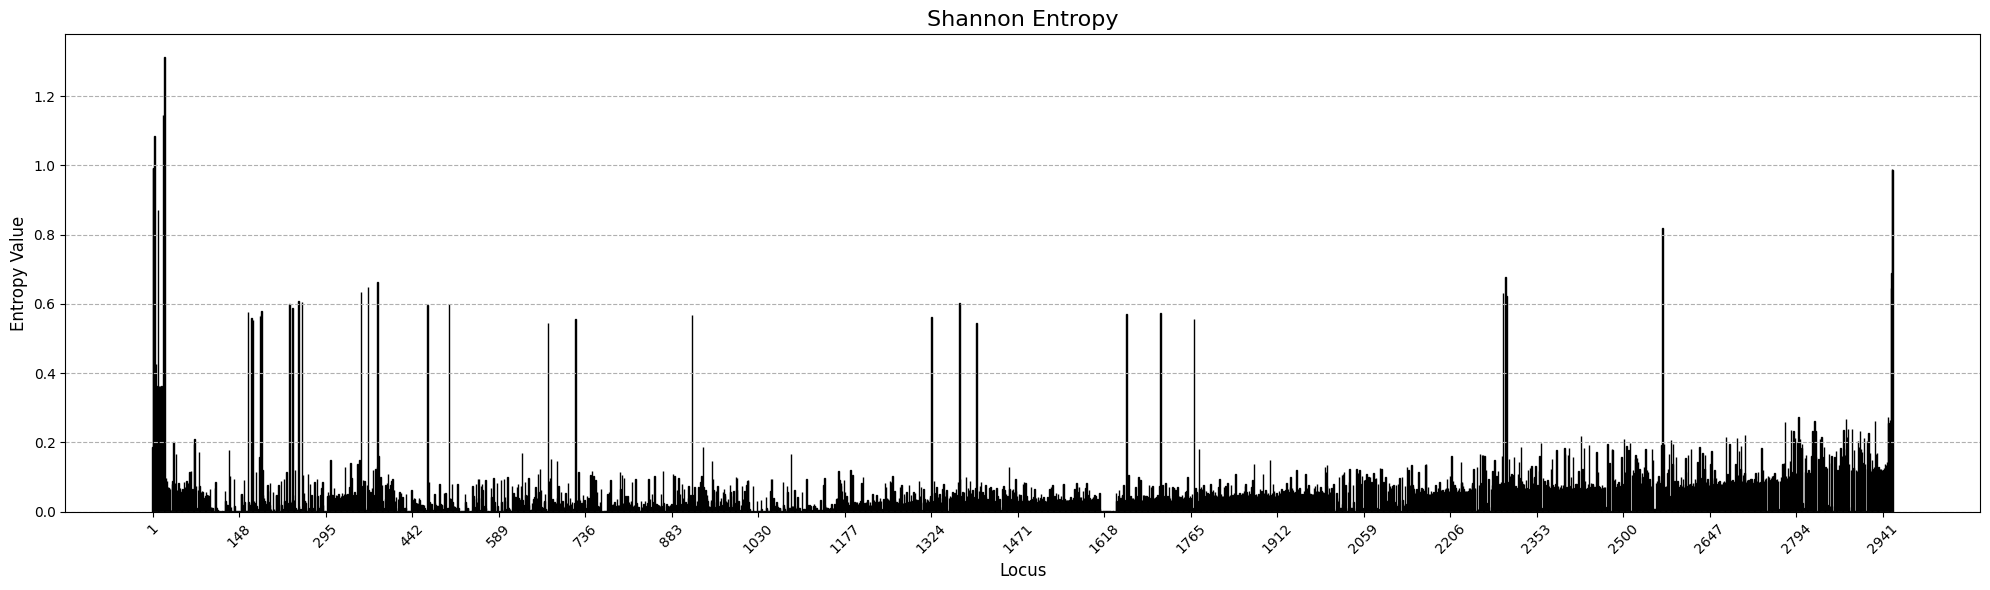

In [11]:
plot_entropy_from_file("/data/ccs_data/qunfeng-2025/akk3.Bam2Msa-fact.fasta.shannon.txt")